In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
import seaborn as sb

In [2]:
df_original = pd.read_csv(filepath_or_buffer='data_train.csv', sep=',', header=0,
                              dtype={'row': int, 'col': int, 'rating': float})

df_original.columns = ['user', 'item', 'rating']

user_id_list = df_original['user'].values
item_id_list = df_original['item'].values
rating_id_list = df_original['rating'].values

user_id_unique = np.unique(user_id_list)
item_id_unique = np.unique(item_id_list)

csr_matrix = sp.csr_matrix((rating_id_list, (user_id_list, item_id_list)))
csr_matrix = csr_matrix.astype(dtype=np.float)

/var/folders/tt/9v6608x550n51759gpcrffsc0000gn/T/ipykernel_14363/958906415.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  csr_matrix = csr_matrix.astype(dtype=np.float)


In [3]:
URM = csr_matrix

In [4]:
profile_length = np.ediff1d(URM.indptr)
profile_length

array([  2,   6,   2, ..., 156,   4,   2], dtype=int32)

In [5]:
sorted_users = np.argsort(profile_length)
sorted_users

array([6012, 3608, 3171, ..., 1863, 2282, 7382])

In [6]:
interactions = []
for i in range(7947):
    interactions.append(len(URM[i,:].nonzero()[0]))
interactions

[2,
 6,
 2,
 2,
 7,
 20,
 4,
 14,
 3,
 6,
 6,
 33,
 3,
 2,
 3,
 14,
 2,
 46,
 12,
 2,
 7,
 15,
 19,
 8,
 3,
 6,
 5,
 8,
 7,
 10,
 8,
 3,
 2,
 4,
 3,
 3,
 14,
 13,
 7,
 2,
 7,
 12,
 10,
 65,
 3,
 4,
 86,
 7,
 29,
 4,
 6,
 14,
 6,
 8,
 2,
 2,
 4,
 17,
 2,
 3,
 6,
 7,
 33,
 8,
 8,
 5,
 9,
 2,
 31,
 2,
 2,
 3,
 20,
 20,
 31,
 21,
 14,
 57,
 4,
 3,
 3,
 46,
 20,
 6,
 16,
 2,
 2,
 31,
 46,
 3,
 25,
 6,
 7,
 8,
 6,
 3,
 6,
 4,
 7,
 15,
 9,
 9,
 4,
 5,
 7,
 3,
 4,
 6,
 17,
 14,
 2,
 12,
 6,
 2,
 6,
 9,
 14,
 3,
 6,
 44,
 3,
 11,
 7,
 7,
 11,
 14,
 5,
 3,
 19,
 4,
 12,
 4,
 3,
 13,
 4,
 7,
 2,
 6,
 2,
 258,
 4,
 25,
 180,
 18,
 2,
 4,
 5,
 2,
 18,
 33,
 3,
 4,
 2,
 2,
 4,
 13,
 14,
 5,
 7,
 8,
 10,
 2,
 1,
 5,
 6,
 165,
 2,
 2,
 2,
 2,
 2,
 2,
 20,
 2,
 4,
 2,
 3,
 31,
 2,
 5,
 12,
 14,
 4,
 11,
 8,
 2,
 13,
 6,
 3,
 5,
 7,
 5,
 4,
 14,
 2,
 8,
 5,
 28,
 11,
 11,
 4,
 24,
 4,
 8,
 5,
 9,
 3,
 22,
 11,
 7,
 25,
 33,
 2,
 2,
 8,
 8,
 37,
 6,
 4,
 5,
 2,
 4,
 4,
 3,
 20,
 9,
 4,
 55,
 5,
 3,
 7,
 

<AxesSubplot:ylabel='Count'>

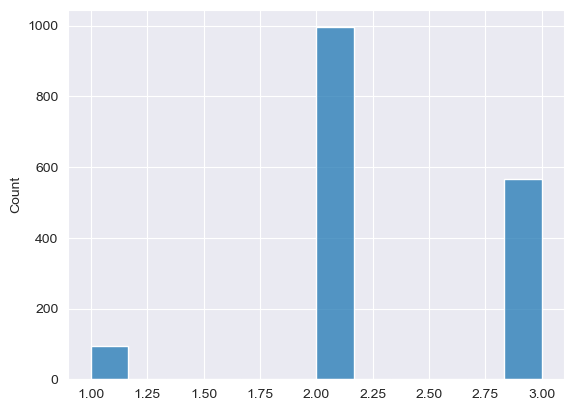

In [7]:
interactions_to_plot = sorted(interactions)[:1653]

sb.histplot(interactions_to_plot)

In [8]:
list_group_interactions = [[0, 7], [8, 18], [19, max(interactions)]]
list_group_interactions

[[0, 7], [8, 18], [19, 1653]]

In [21]:
for group_id in range(0, 3):
    lower_bound = list_group_interactions[group_id][0]
    higher_bound = list_group_interactions[group_id][1]

    users_in_group = [user_id for user_id in range(len(interactions))
                      if (lower_bound <= interactions[user_id] <= higher_bound)]
    users_in_group_p_len = profile_length[users_in_group]

    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]

    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id,
        len(users_in_group),
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 4677, average p.len 3.87, median 4.0, min 1, max 7
Group 1, #users in group 1975, average p.len 11.10, median 10.0, min 8, max 18
Group 2, #users in group 1295, average p.len 56.55, median 33.0, min 19, max 1653


In [9]:
block_size = int(len(profile_length) * 0.2)

for group_id in range(0, 5):
    start_pos = group_id * block_size
    end_pos = min((group_id + 1) * block_size, len(profile_length))

    users_in_group = sorted_users[start_pos:end_pos]

    users_in_group_p_len = profile_length[users_in_group]

    users_not_in_group_flag = np.isin(sorted_users, users_in_group, invert=True)
    users_not_in_group = sorted_users[users_not_in_group_flag]

    print("Group {}, #users in group {}, average p.len {:.2f}, median {}, min {}, max {}".format(
        group_id,
        len(users_in_group),
        users_in_group_p_len.mean(),
        np.median(users_in_group_p_len),
        users_in_group_p_len.min(),
        users_in_group_p_len.max()))

Group 0, #users in group 1589, average p.len 2.26, median 2.0, min 1, max 3
Group 1, #users in group 1589, average p.len 3.60, median 4.0, min 3, max 5
Group 2, #users in group 1589, average p.len 6.00, median 6.0, min 5, max 8
Group 3, #users in group 1589, average p.len 10.28, median 10.0, min 8, max 15
Group 4, #users in group 1589, average p.len 47.42, median 28.0, min 15, max 1074
